In [121]:
import itertools
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 100)
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import pickle

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


In [122]:
df = pd.read_csv('joined_data_life.csv', index_col=0)

In [123]:
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,obesity,gdp_per_capita,suicides_no
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,5.2,NaN,NaN
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,4.9,NaN,NaN
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,4.7,NaN,NaN
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,4.4,NaN,NaN
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,4.2,NaN,NaN


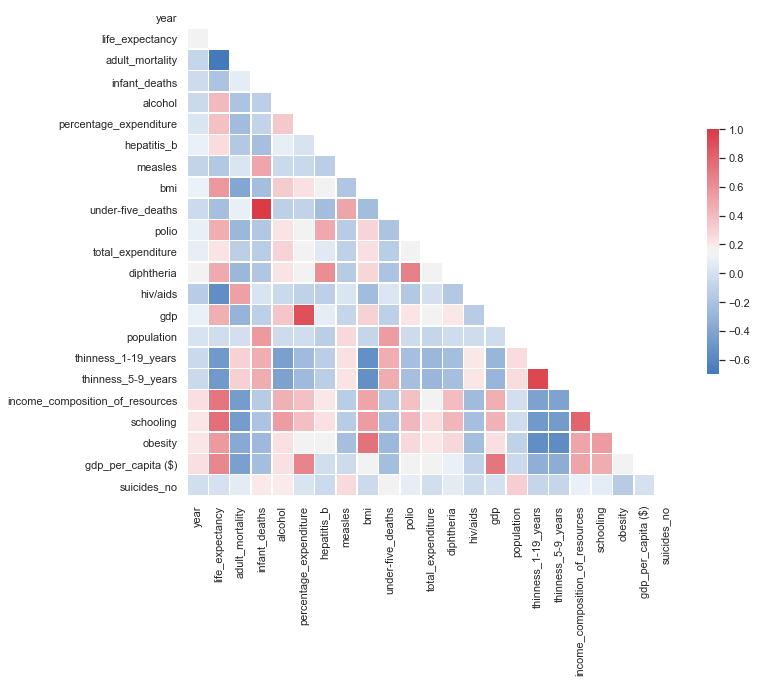

In [46]:
def CorrMtx(df, dropDuplicates = True):

    # Your dataset is already a correlation matrix.
    # If you have a dateset where you need to include the calculation
    # of a correlation matrix, just uncomment the line below:
    # df = df.corr()

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(df.corr(), dropDuplicates = True)

In [97]:
df.head(2)

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,obesity,sex,obesity,gdp_per_capita,suicides_no
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,5.2 [3.3-7.7],Both sexes,5.2,NaN,NaN
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,4.9 [3.1-7.3],Both sexes,4.9,NaN,NaN


In [167]:
df.groupby(['year']).life_expectancy.mean()

year
2000    66.750273
2001    67.128962
2002    67.351366
2003    67.433333
2004    67.646448
2005    68.209290
2006    68.667760
2007    69.036066
2008    69.427869
2009    69.938251
2010    70.048634
2011    70.654098
2012    70.916940
2013    71.236066
2014    71.536612
2015    71.616940
Name: life_expectancy, dtype: float64

# Hypothesis Testing

    H(null): Life Expectancy (Developed Country) = Life Expectancy (Developing Country)
    H(alternative): Life Expectancy (Developed Country) != Life Expectancy (Developing Country)

In [ ]:
developed = df[df['status']== 'Developed']
developing = df[df['status']== 'Developing']
developing.life_expectancy.dropna(inplace=True)

In [119]:
stats.ttest_ind(developed['life_expectancy'], developing['life_expectancy'])

Ttest_indResult(statistic=29.76836505889292, pvalue=2.4650861700062064e-170)

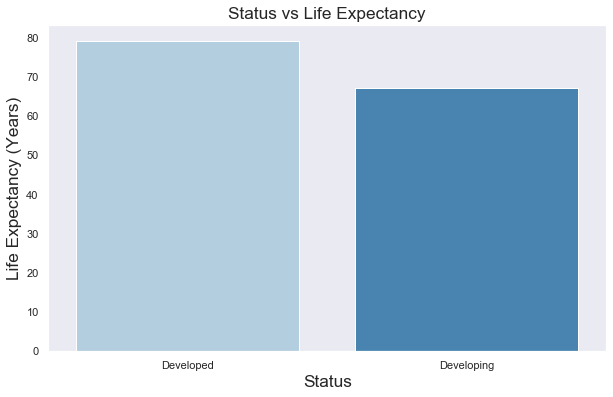

In [133]:
#Lets graph and the difference between status and life expectancy
y = df.groupby(['status']).life_expectancy.mean().fillna(0)
x = y.index;
figure, ax = plt.subplots(figsize = (10,6));
sns.barplot(x,y, palette="Blues");
sns.set(style='dark')
ax.set_title('Status vs Life Expectancy', fontdict={'fontsize':'x-large'});
ax.set_xlabel('Status', fontdict={'fontsize':'x-large'});
ax.set_ylabel('Life Expectancy (Years)', fontdict={'fontsize':'x-large'});
# plt.suptitle(")", fontsize=18);

Is there a difference in obesity in developed countries vs developing countries?

    H(null): Obesity (Developed Country) = Obesity (Developing Country)
    H(alternative): Obesity (Developed Country) != Obesity (Developing Country)

In [136]:
developing.obesity.isna().sum()

309

In [135]:
developed.obesity.isna().sum()

64

In [141]:
developing.obesity.dropna(inplace=True)
developed.obesity.dropna(inplace=True)

In [142]:
stats.ttest_ind(developed['obesity'], developing['obesity'])

Ttest_indResult(statistic=8.718160546902753, pvalue=4.985541604428258e-18)

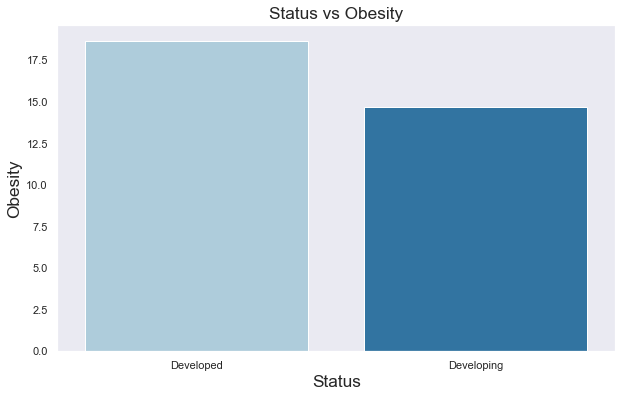

In [151]:
y = df.groupby(['status']).obesity.mean().fillna(0)
x = y.index;
figure, ax = plt.subplots(figsize = (10,6));
sns.barplot(x,y, palette="Paired");
sns.set(style='dark')
ax.set_title('Status vs Obesity', fontdict={'fontsize':'x-large'});
ax.set_xlabel('Status', fontdict={'fontsize':'x-large'});
ax.set_ylabel('Obesity', fontdict={'fontsize':'x-large'});

    H(null): Suicide (Developed Country) = Suicide (Developing Country)
    H(alternative): Suicide (Developed Country) != Suicide (Developing Country)

In [160]:
developing.suicides_no.isna().sum()

1636

In [161]:
developed.suicides_no.isna().sum()

62

In [164]:
developing.suicides_no.dropna(inplace=True)
developed.suicides_no.dropna(inplace=True)

In [165]:
stats.ttest_ind(developed['suicides_no'], developing['suicides_no'])

Ttest_indResult(statistic=0.6331390757543498, pvalue=0.5267597621093666)

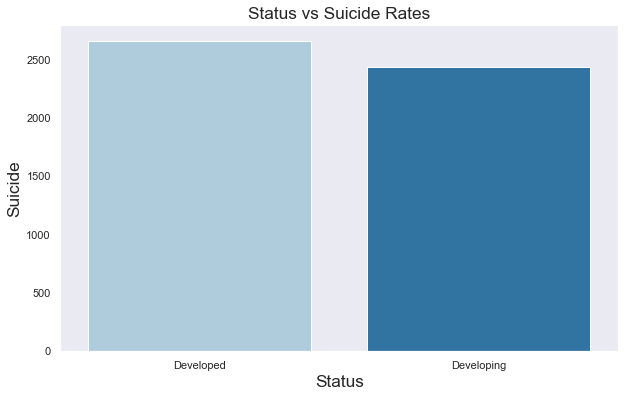

In [166]:
y = df.groupby(['status']).suicides_no.mean().fillna(0)
x = y.index;
figure, ax = plt.subplots(figsize = (10,6));
sns.barplot(x,y, palette="Paired");
sns.set(style='dark')
ax.set_title('Status vs Suicide Rates', fontdict={'fontsize':'x-large'});
ax.set_xlabel('Status', fontdict={'fontsize':'x-large'});
ax.set_ylabel('Suicide', fontdict={'fontsize':'x-large'});

# Regression

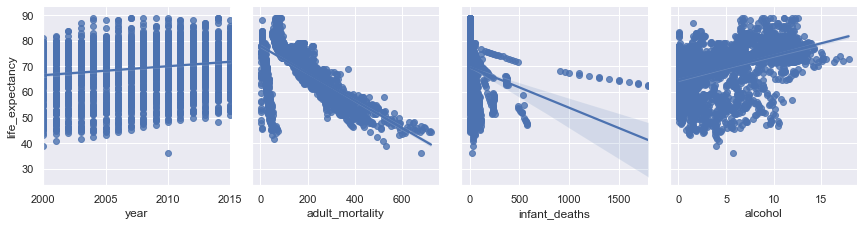

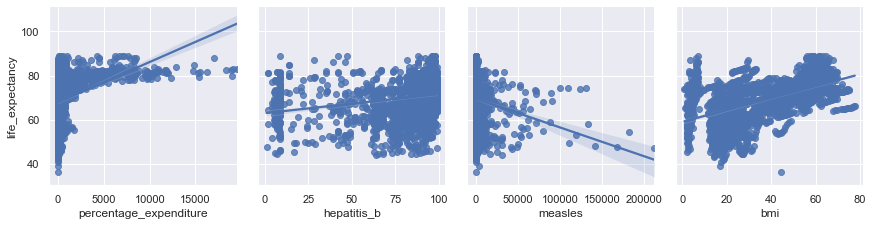

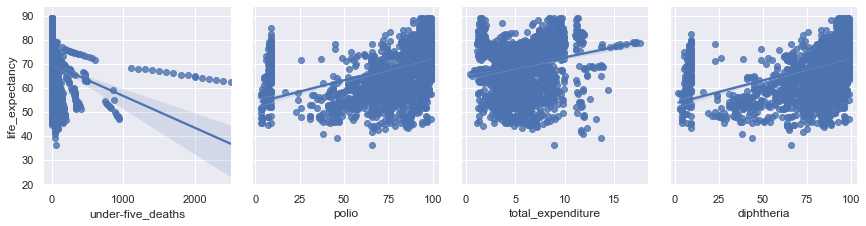

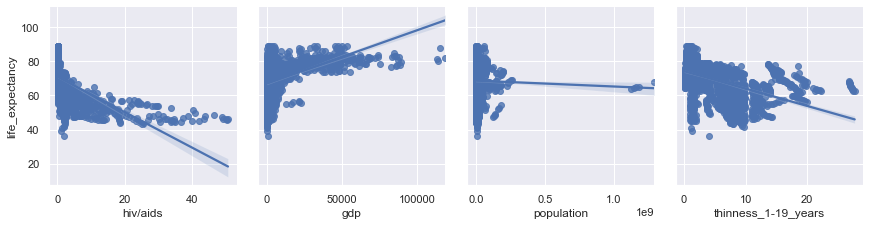

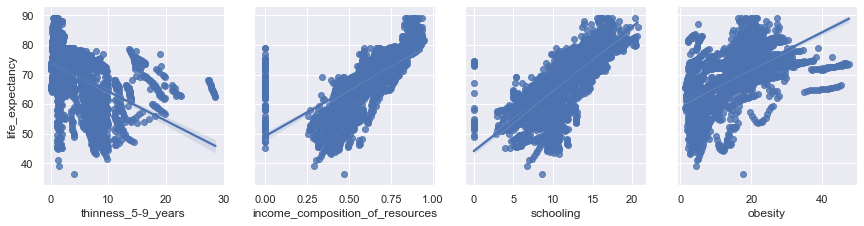

In [105]:
features = ['year', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling', 'obesity']
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['life_expectancy'],x_vars=i, kind="reg", height=3)

In [157]:
ols('life_expectancy~obesity',data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     1180.
Date:                Thu, 18 Jun 2020   Prob (F-statistic):          5.41e-213
Time:                        22:08:49   Log-Likelihood:                -8916.2
No. Observations:                2560   AIC:                         1.784e+04
Df Residuals:                    2558   BIC:                         1.785e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.0747      0.312    192.494      0.000      59.463      60.687
obesity        0.6067      0.018     34.353      0.000       0.572       0.641
==============================================================================
Omnibus:                       46.430   Durbin-Watson:                   0.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.145
Skew:                          -0.315   Prob(JB):                     2.13e-11
Kurtosis:                       3.252   Cond. No.                         35.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

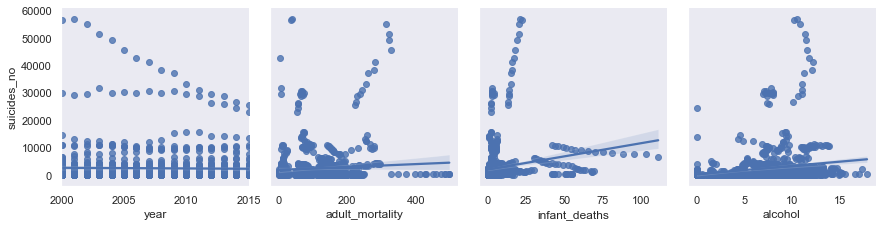

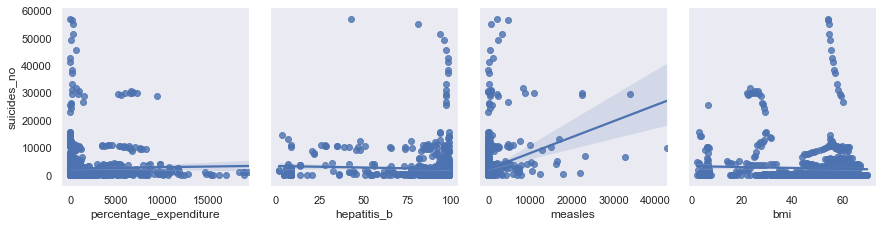

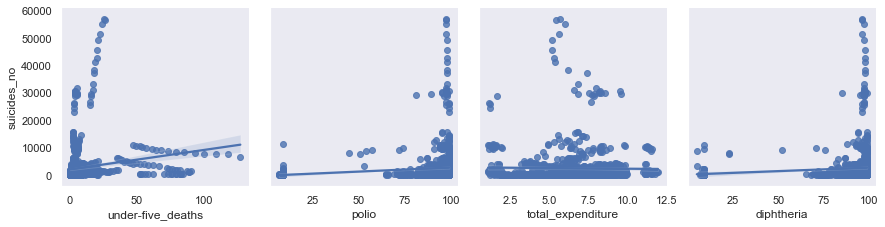

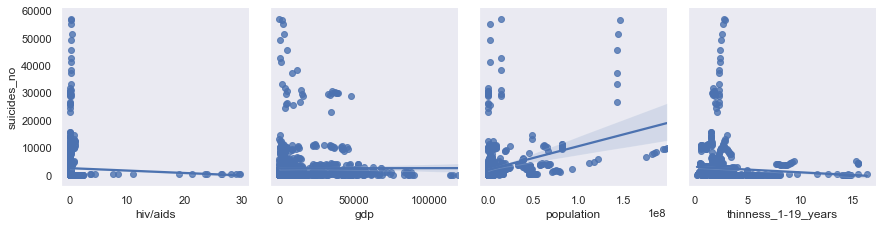

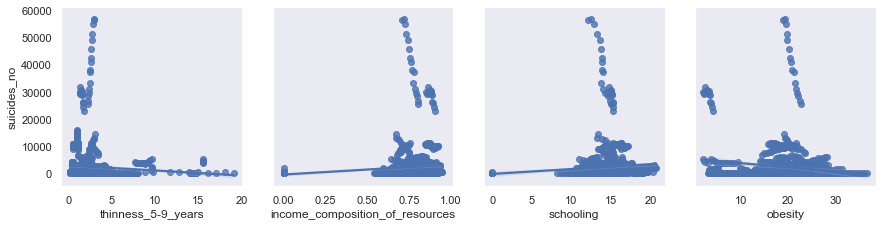

In [152]:
features = ['year', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling', 'obesity']
n = 4
row_groups= [features[i:i+n] for i in range(0, len(features), n) ]
for i in row_groups:
    pp = sns.pairplot(data=df, y_vars=['suicides_no'],x_vars=i, kind="reg", height=3)

In [153]:
ols('suicides_no~obesity+alcohol+measles+bmi',data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            suicides_no   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     42.70
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           2.24e-33
Time:                        22:07:42   Log-Likelihood:                -11341.
No. Observations:                1126   AIC:                         2.269e+04
Df Residuals:                    1121   BIC:                         2.272e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1669.5404    689.582      2.421      0.016     316.524    3022.557
obesity     -131.5760     34.436     -3.821      0.000    -199.143     -64.009
alcohol      310.2152     46.591      6.658      0.000     218.800     401.631
measles        0.6407      0.068      9.473      0.000       0.508       0.773
bmi           14.5892     11.603      1.257      0.209      -8.176      37.355
==============================================================================
Omnibus:                     1193.334   Durbin-Watson:                   0.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62531.097
Skew:                           5.210   Prob(JB):                         0.00
Kurtosis:                      37.989   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""